In [3]:
from quantumsim.functions.ansatz import *
from quantumsim.functions.min_methods import *
from quantumsim.functions.funciones import *
from quantumsim.optimizacion_structure import *
from quantumsim.variational_quantum_eigensolver import *

from pennylane import numpy as np

# Molecula de $H^2$
En este jupyter se estudia un dimero de hidrogeno sin campo usando el variational quantum deflation para obtener todos los eigenvalues y eigenvectors del hamiltoniano.

Con estos, podemos calcular algunos observables usando la temperatura.

### Espectro energetico

In [2]:
symbols = ["H", "H"]
coordinates = np.array([0.0, 0.0, -0.6614, 0.0, 0.0, 0.6614], requires_grad=True)

#Parametros del hamiltoniano molecular
params = {
    'mapping': "jordan_wigner",
    'charge': 0, 
    'mult': 1,
    'basis': 'sto-3g',
    'method': 'dhf'
}

#Construccion de la clase
molecule = vqe_molecular(symbols, coordinates, params)

In [3]:
ansatz_params = {
    "repetitions": 3,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 1000.0,
    "token": None,
}

# Seteo de hiperparametros del circuito
molecule.set_device( ansatz_params )
molecule.set_node( ansatz_params )

rep = molecule.qubits*ansatz_params["repetitions"]

In [4]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 100,
    "tol": 0.000001,
    "number": molecule.qubits*ansatz_params["repetitions"]}

# Ejecucion del optimizador para calcular los niveles 
# de energia

optimizer = scipy_optimizer(minimizate_params)
energy, optimum = optimizer.VQD(molecule.cost_function, molecule.overlap_cost_function, 16)

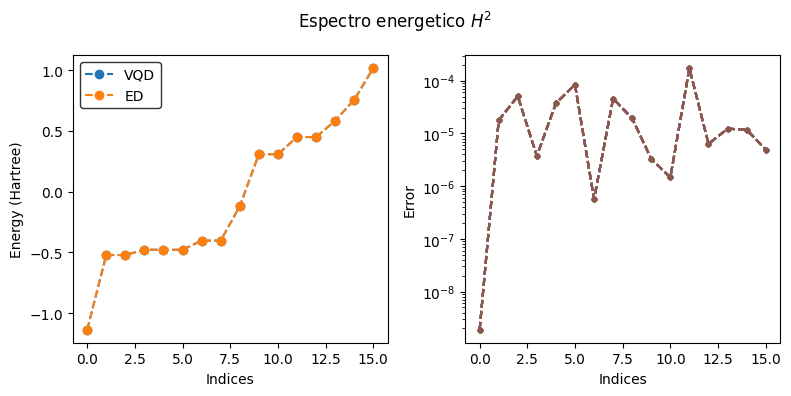

In [41]:
import matplotlib.pyplot as plt

exacto = [-1.1361891 , -0.52188355, -0.52188349, -0.47844693, -0.47844693,
        -0.4784469 , -0.40317875, -0.40317875, -0.12044625,  0.30767557,
         0.3076756 ,  0.44909644,  0.4490965 ,  0.58332568,  0.75597221,
         1.01609778]

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel('Indices', fontsize=10)
ax[0].set_ylabel('Energy (Hartree)', fontsize=10)

ax[0].plot([i for i in range(16)], np.sort(energy), "o--", label="VQD")
ax[0].plot([i for i in range(16)], exacto, "o--", label="ED")
ax[0].legend(loc="upper left", fontsize='medium',frameon=True, edgecolor='k', ncol=1)

ax[1].set_xlabel('Indices', fontsize=10)
ax[1].set_ylabel('Error', fontsize=10)
for i in range(len(energy)):
    ax[1].plot([i for i in range(16)], [np.abs(float(j)- exacto[k]) for k,j in enumerate( np.sort(energy) )], ".", ls="dashed")
ax[1].set_yscale("log")

fig.suptitle('Espectro energetico $H^2$', fontsize=12)
fig.tight_layout()
plt.show()

### Fisica

Con los niveles de energia, es posible analizar cantidades magnetocaloricas. Con los eigenvalues, es posible calcular de forma directa la funcion de particion y el calor especifico. Para calcular otras cantidades como la magnetizacion, es necesario utilizar circuitos para calcular el valor esperado de la magnetizacion.